In [1]:
import numpy as np
import matplotlib.pyplot as plt

from activations import Activations

%load_ext autoreload
%autoreload 2

# Load ratemaps and init activations analisys

In [2]:
ratemaps = np.load('../data/activations512r40.npy')
activations = Activations(ratemaps)

# Calculate sacs of activations

In [41]:
sacs = activations.calculate_sacs(mask=1.2)

# Compute persistence diagrams of sacs

In [42]:
dgms = activations.calculate_dgms()

In [12]:
from gtda.diagrams import PairwiseDistance

In [16]:
pairdis = PairwiseDistance(metric='bottleneck', order=None)
D = pairdis.fit_transform(dgms[0:2])
D

array([[[0.        , 0.        ],
        [0.27502787, 0.02090903]],

       [[0.27280869, 0.02090903],
        [0.        , 0.        ]]])

In [22]:
dgms.shape

(512, 83, 3)

# Visualize ratemap, sac and persistence diagram of sac

In [24]:
dgmskt = [[None]*2]*(len(dgms))
#transform diagram from giotto to scikittda
for i in range(len(dgms)):
    for j in list(set(dgms[i,:,2])):
        dgmskt[i][int(j)]=(((dgms[i,np.where(dgms[i,:,2]==j),:2]).reshape(-1,2)))
        

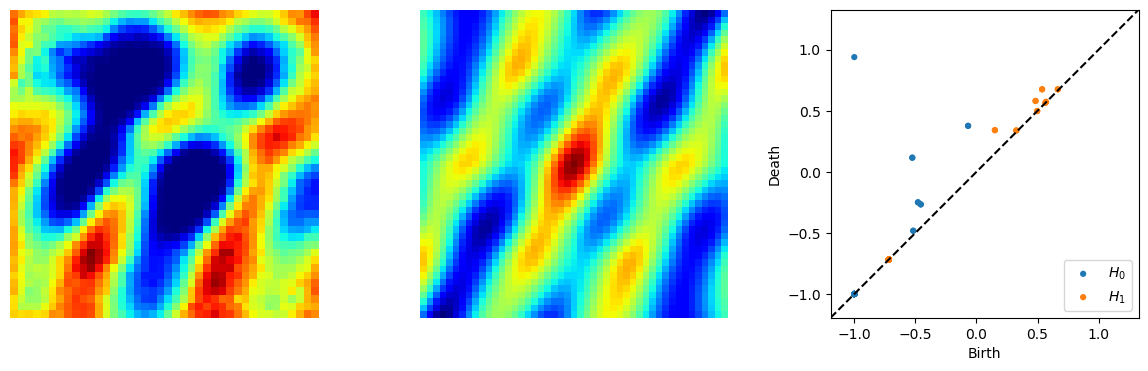

In [65]:
idx = 150

activations.plot_rm_sac_dgm(idx)

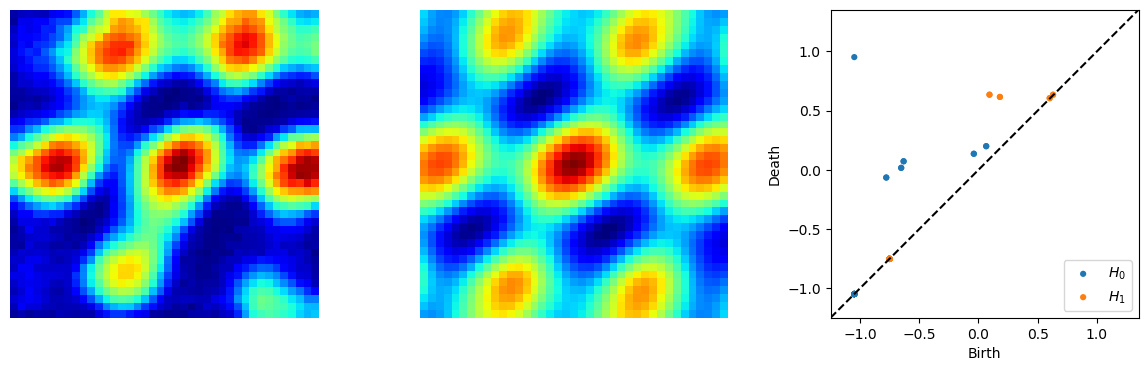

In [110]:
idx = 11
activations.plot_rm_sac_dgm(idx)

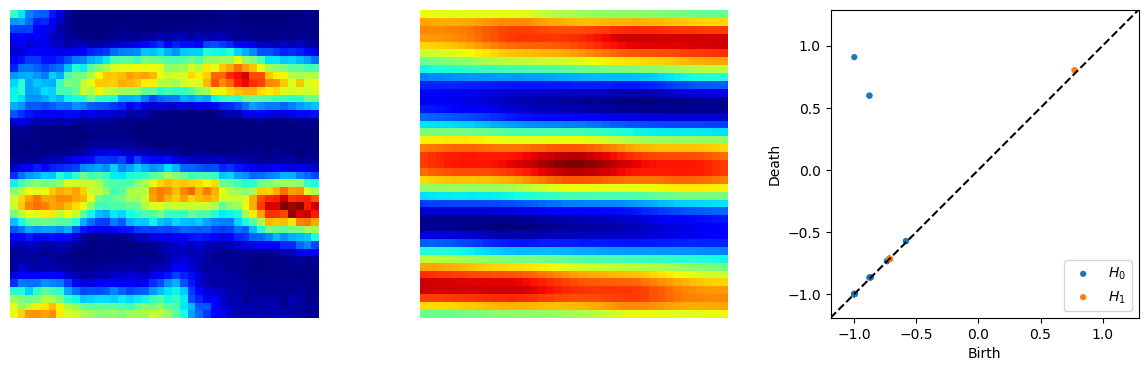

In [6]:
idx = 300
activations.plot_rm_sac_dgm(idx)

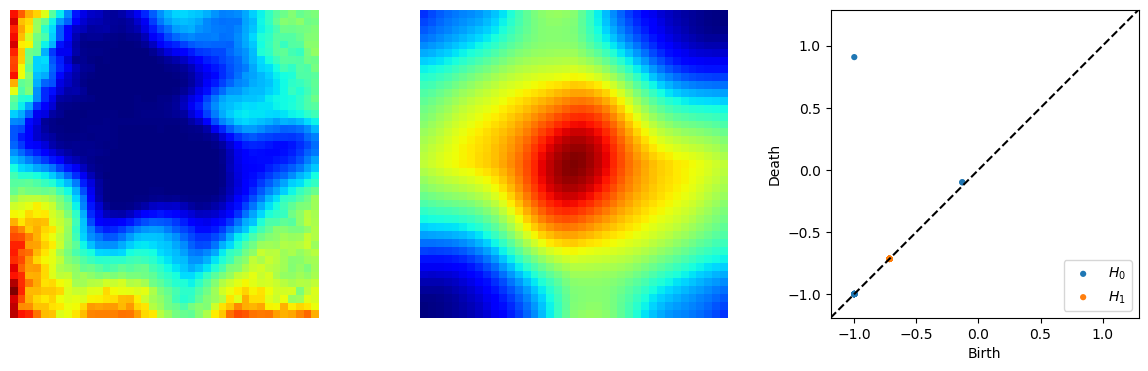

In [7]:
idx = 500
activations.plot_rm_sac_dgm(idx)

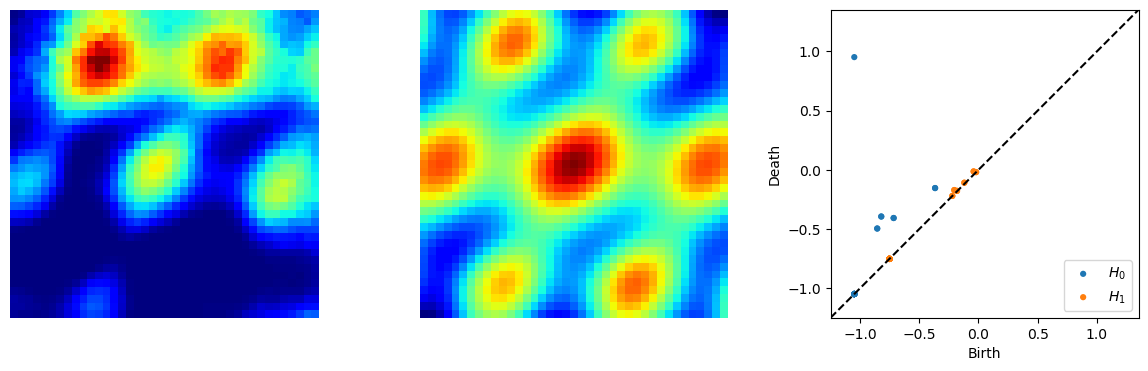

In [112]:
idx = 0
activations.plot_rm_sac_dgm(idx)

# Scale diagrams?

The SAC values are limited in the range [-1,1], since every entry of the sac matrix is the Pearson correlation coefficient beetween the ratemap and a shifted version of it.

The max value of every sacs is 1, because the central point of every sac is the Pearson r of the ratemap with itself.

In [42]:
np.max(sacs), np.min(sacs)

(1.0, -0.9081838486790071)

In [43]:
np.min(dgms[:,:,:2]),np.max(dgms[:,:,:2])

(-1.0, 0.9081838486790071)

The min value, instead, is different for every sacs.

The persistence diagram are computed on the super-level set filtration of the sacs, wich is the sub-level set filtration of the opposite: -sac.

So the min value of the filtration parameter is -1 for every sac, while the max value of the filtration parameter differs for evey sac.

The max value of filtration parameter can be set manually: this is the value assigned to topological features which have infinite death time. In this case we could set this value to 1.

In [44]:
from gtda.homology import CubicalPersistence
from gtda.diagrams import ForgetDimension, Amplitude, Scaler, PairwiseDistance
from gtda.plotting import plot_diagram

Dgms can be scaled before computing the distances beetween them.
The scale value is computed in this way: 
* For every diagram we calculate its amplitude which is the "distance (according to some metric) of the diagram from the (trivial) diagonal diagram." This return a vector of amplitudes a = $(a_{i})$ (where i range over the available homology dimensions), or the p-norm of a.
* From the 2d matrix of amplitudes a single value is chosen, by default using np.max

Finally the birth and death of each point of each dgms are divided by the scale value.



In [45]:
sca = Scaler(metric='bottleneck')

In [46]:
scadgms = activations.calculate_dgms()
sca.fit_transform(scadgms)
print('scale =',sca.scale_)
print('\n')
print(dgms[0,:3])
print('\n')
print(scadgms[0,:3])

scale = 0.9540919243395036


[[-1.          0.90818385  0.        ]
 [-0.78273519 -0.37565019  0.        ]
 [-0.78273519 -0.37565019  0.        ]]


[[-1.04811704  0.95188296  0.        ]
 [-0.82039808 -0.39372537  0.        ]
 [-0.82039808 -0.39372537  0.        ]]


# Filtering diagrams

In [47]:
from gtda.diagrams import Filtering

In [48]:
filtering = Filtering(epsilon=0.01)

All points with lifetime <= epsilon are discarded. (Technically, discarded points are replaced by points on the diagonal ,i.e. whose birth and death values coincide, which carry no information.)

In [49]:
dgms0fil = filtering.fit_transform(dgms[0][np.newaxis,...])

In [50]:
print('Before the filtration the number of points was:')
print(len(dgms[0][np.where(dgms[0,:,0]!=dgms[0,:,1])]))
print('After the filtration the number of points is:')
print(len(dgms0fil[0][np.where(dgms0fil[0,:,0]!=dgms0fil[0,:,1])]))

Before the filtration the number of points was:
21
After the filtration the number of points is:
15


# Distances

Calculate pairwise distance between all pairs of diagrams: return a collection of distance matrices (one for every homology dimensions) or a single distance matrix constructed by taking the p-norms of the vectors of distances between diagram pairs.


In [51]:
from gtda.diagrams import PairwiseDistance

In [52]:
pairdis = PairwiseDistance(metric='bottleneck', order=None)

In [54]:
D = pairdis.fit_transform(dgms)

In [74]:
pairdis = PairwiseDistance(metric='wasserstein', order=None)
DW = pairdis.fit_transform(dgms)

In [61]:
pairdis = PairwiseDistance(metric='landscape', order=None)

In [62]:
Dland = pairdis.fit_transform(dgms)

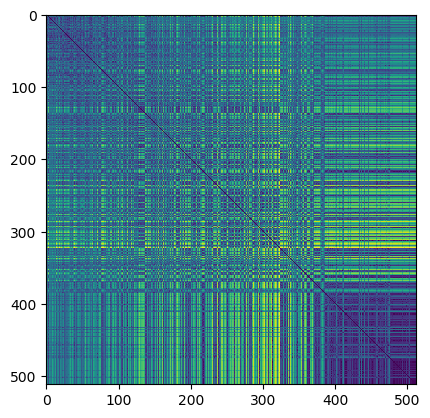

In [71]:
plt.imshow(D[:,:,0])

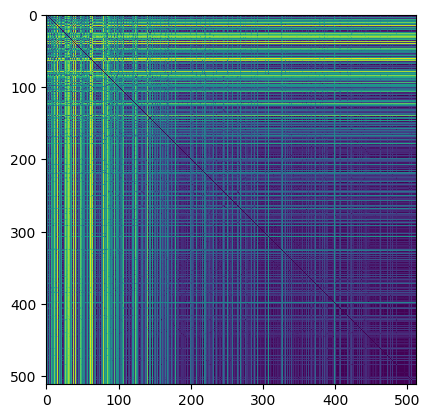

In [72]:
plt.imshow(D[:,:,1])

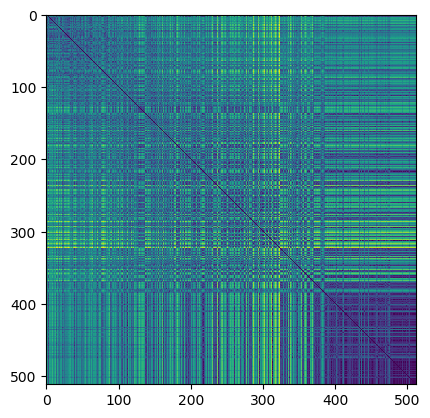

In [75]:
plt.imshow(DW[:,:,0])

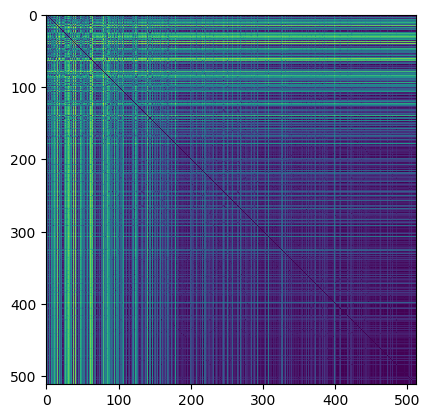

In [76]:
plt.imshow(DW[:,:,1])

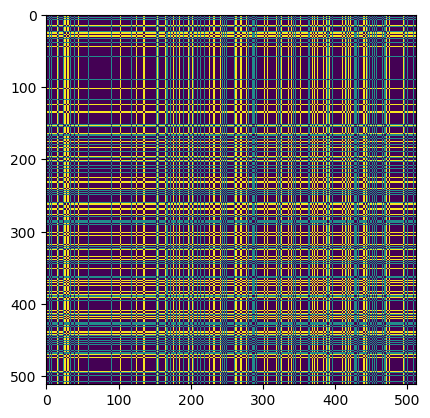

In [77]:
plt.imshow(Dland[:,:,0])

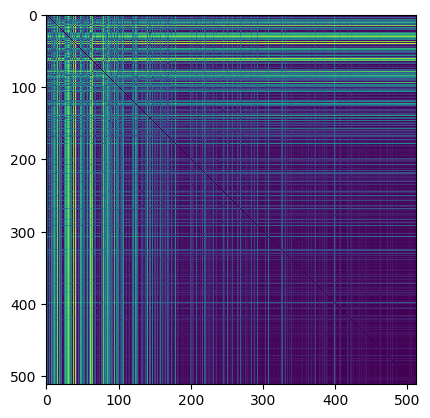

In [79]:
plt.imshow(Dland[:,:,1])

In [81]:
Dland[:10,:10,1]

array([[0.        , 0.00354726, 0.04286046, 0.00652494, 0.05411207,
        0.09310584, 0.01062956, 0.08186795, 0.04887971, 0.0034046 ],
       [0.00354726, 0.        , 0.04265656, 0.00674832, 0.05394787,
        0.09234573, 0.01075574, 0.08153107, 0.04889997, 0.00378017],
       [0.04286046, 0.04265656, 0.        , 0.04324322, 0.016157  ,
        0.06708077, 0.03501693, 0.04426487, 0.02575892, 0.04246736],
       [0.00652494, 0.00674832, 0.04324322, 0.        , 0.05441574,
        0.09326863, 0.01208074, 0.08206898, 0.04921567, 0.00667443],
       [0.05411207, 0.05394787, 0.016157  , 0.05441574, 0.        ,
        0.06711056, 0.0471604 , 0.03903582, 0.01840308, 0.05379905],
       [0.09310584, 0.09234573, 0.06708077, 0.09326863, 0.06711056,
        0.        , 0.08768366, 0.03758734, 0.07973316, 0.09233763],
       [0.01062956, 0.01075574, 0.03501693, 0.01208074, 0.0471604 ,
        0.08768366, 0.        , 0.0748639 , 0.04410141, 0.01023394],
       [0.08186795, 0.08153107, 0.0442648

In [84]:
pairdis = PairwiseDistance(metric='landscape', metric_params={'n_bins':1000},order=None)

In [86]:
Dland2 =pairdis.fit_transform(dgms)

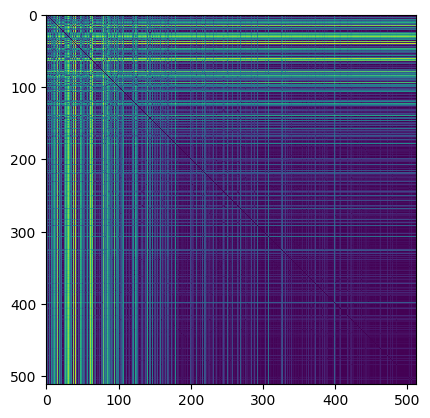

In [88]:
plt.imshow(Dland2[:,:,1])

In [89]:
pairdis = PairwiseDistance(metric='betti', order=None)

In [90]:
Dbetti = pairdis.fit_transform(dgms)

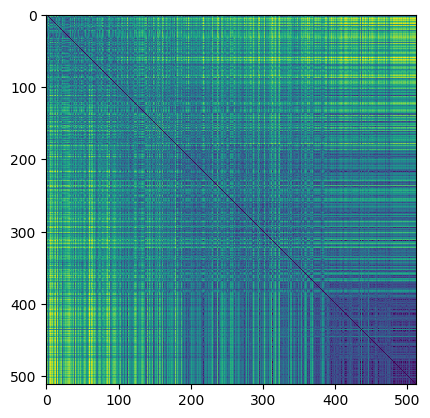

In [95]:
plt.imshow(Dbetti[:,:,0])

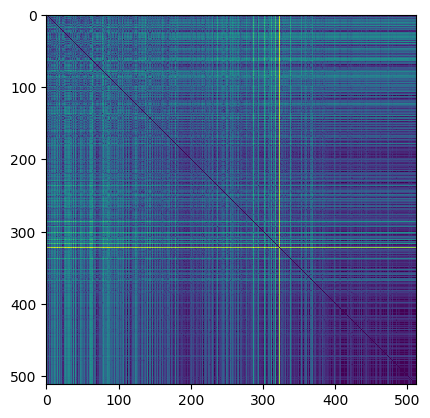

In [96]:
plt.imshow(Dbetti[:,:,1])

In [97]:
pairdis = PairwiseDistance(metric='heat', order=None)

In [98]:
Dheat = pairdis.fit_transform(dgms)

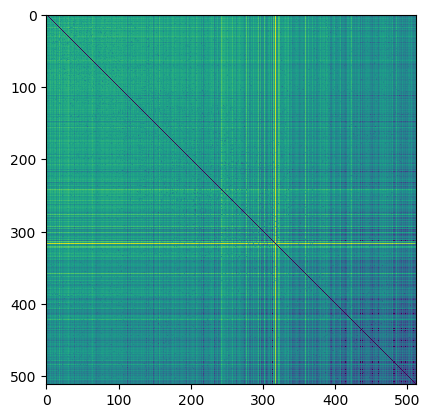

In [99]:
plt.imshow(Dheat[:,:,0])

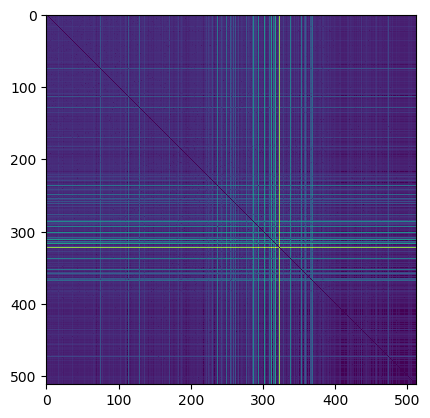

In [100]:
plt.imshow(Dheat[:,:,1])

In [104]:
pairdis = PairwiseDistance(metric='persistence_image', metric_params={'weight_function':None}, order=None)